In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
da=pd.read_csv("dataframe_.csv")

In [3]:
da.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
da.shape

(1697, 2)

In [5]:
#check for missing values
da.isnull().any()

input     True
output    True
dtype: bool

In [6]:
da.isnull().any()/da.shape[0]

input     0.000589
output    0.000589
dtype: float64

In [7]:
da.dropna(inplace=True)
da.isnull().any()

input     False
output    False
dtype: bool

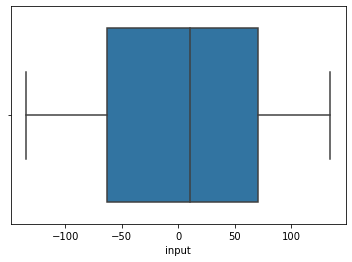

In [8]:
#check for outlies
sns.boxplot(da["input"])
plt.show()

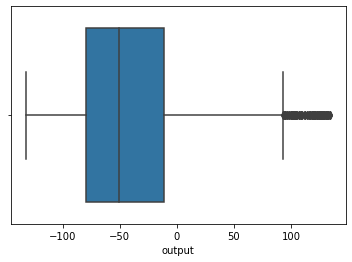

In [9]:
sns.boxplot(da["output"])
plt.show()

In [10]:
da["output"].describe()

count    1696.000000
mean      -34.088017
std        65.771112
min      -132.422167
25%       -80.026767
50%       -50.470981
75%       -11.000000
max       134.425495
Name: output, dtype: float64

In [11]:
def outliers(data,variable):
    IQR=data[variable].describe()["75%"]-data[variable].describe()["25%"]
    lower_boundary=data[variable].describe()["25%"]-(1.5*IQR)
    upper_boundary=data[variable].describe()["75%"]+(1.5*IQR)
    return(lower_boundary,upper_boundary)

In [12]:
outliers(da,"output")

(-183.56691662499998, 92.54014997499999)

In [13]:
da.loc[da['output']>=92.54014997499999,'output']=92.54014997499999
da.loc[da['output']<=-183.56691662499998,'output']=-183.56691662499998

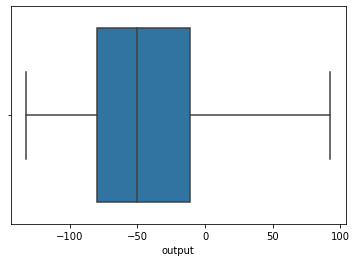

In [14]:
sns.boxplot(da["output"])
plt.show()

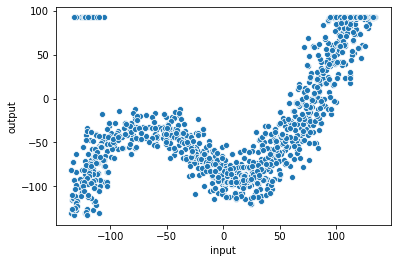

In [15]:
#Data Visualization:- we do bivariate . num Vs num
sns.scatterplot(da["input"],da["output"])

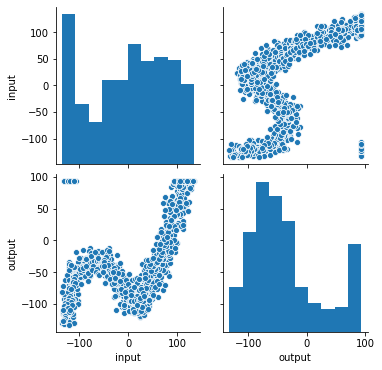

In [16]:
sns.pairplot(da)

In [17]:
da.corr()

,input,output
input,1.000000,0.538506
output,0.538506,1.000000


In [18]:
#split the data into dependent and independent
x=da.iloc[:,0:1]
y=da.iloc[:,1]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [26]:
#train the model 
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5,p=2)
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [27]:
y_pred2=knn_model.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred2)
mse

1120.7769367552169

In [31]:
rmse=np.sqrt(mse)
rmse

33.47800676198057

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.7056550540868138

In [35]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred1=dr.predict(x_test)
mse=mean_squared_error(y_test,y_pred1)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
print("r2score:",r2_score(y_test,y_pred1)*100)

1133.7774246542424
33.671611554160016
r2score: 70.22407904791396


In [33]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor
rfr_model=RandomForestRegressor(n_estimators=10, random_state=42)
rfr_model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=42)

In [34]:
y_pred=rfr_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
print("r2score:",r2_score(y_test,y_pred)*100)

1102.4649981848086
33.203388353973885
r2score: 71.04642417059641


# Comparison of all the model
1. AS we can see that model are working well and we can see clearly that Random forest give accuracy 71% and When we using Knn and decision tree both give less accuracy 70% and 70%

2. Random forest is work better when we have this kind o
f data because the Knn algorithm is slow to keep track of all training data and the random forest is more accurate and robust
 